In [1]:
import os
import h5py
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN, KMeans
from mne.filter import filter_data, notch_filter
from sklearn.calibration import calibration_curve
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, roc_curve, auc, recall_score, precision_score, f1_score, confusion_matrix

matplotlib.rcParams.update({'font.size':30
                            , 'font.family': 'Times New Roman'
                            , 'axes.labelsize': 30
                            , 'axes.titlesize': 30
                            , 'xtick.labelsize': 30
                            , 'ytick.labelsize': 30
                            , 'legend.fontsize': 30
                            , 'figure.titlesize': 30
                            # , 'figure.dpi': 300
                            })



# file_path = "./Net1d_newGroup/PAF_net1d_Group2/list_data.h5"
# file_path = "Net1d_NewGroup_randomindex2\PAF_net1d_randomindex2_Group1\list_data.h5"
# file_path = r"E:\a天理本人相关\智慧医疗\Server\PAF\Net1d_newGroup\PAF_net1d_Group2_testbad/list_data.h5"
# file_path = "Net1d_Split\PAF_net1d_Split1_4\list_data.h5" good
# file_path = "Net1d_Split\PAF_net1d_Split1_4\list_data.h5"
# file_path = "Net1d_Split1_denoise\PAF_net1d_SplitDenoise_FirstNum-16\list_data16.h5"
# file_path = "Net1d_Split1_denoise\PAF_net1d_SplitDenoise_FirstNum-17\list_data17.h5"
# file_path = "Net1d_Split1_denoise\PAF_net1d_SplitDenoise_FirstNum-43\list_data43.h5"
file_path = "Net1d_Split1_denoise\PAF_net1d_SplitDenoise_FirstNum-67/list_data67.h5"
# file_path = "Net1d_Split1_denoise\PAF_net1d_SplitDenoise_FirstNum-103/list_data103.h5"

hf_keys = []
data = {}
with h5py.File(file_path, 'r') as hf:
    for key in hf.keys():
        hf_keys.append(key)
        data[key] = hf[key][:]
print(hf_keys)
print(len(hf_keys))

d:\Anaconda\envs\shap\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['data_0_1', 'data_0_10', 'data_0_11', 'data_0_12', 'data_0_13', 'data_0_14', 'data_0_15', 'data_0_2', 'data_0_3', 'data_0_4', 'data_0_5', 'data_0_6', 'data_0_7', 'data_0_8', 'data_0_9', 'data_101_1', 'data_101_10', 'data_101_2', 'data_101_3', 'data_101_4', 'data_101_5', 'data_101_6', 'data_101_7', 'data_101_8', 'data_101_9', 'data_10_1', 'data_10_10', 'data_10_11', 'data_10_12', 'data_10_13', 'data_10_14', 'data_10_2', 'data_10_3', 'data_10_4', 'data_10_5', 'data_10_6', 'data_10_7', 'data_10_8', 'data_10_9', 'data_15_1', 'data_15_10', 'data_15_11', 'data_15_12', 'data_15_13', 'data_15_14', 'data_15_15', 'data_15_16', 'data_15_2', 'data_15_3', 'data_15_4', 'data_15_5', 'data_15_6', 'data_15_7', 'data_15_8', 'data_15_9', 'data_20_1', 'data_20_2', 'data_20_3', 'data_24_1', 'data_24_10', 'data_24_11', 'data_24_12', 'data_24_13', 'data_24_14', 'data_24_15', 'data_24_16', 'data_24_17', 'data_24_18', 'data_24_19', 'data_24_2', 'data_24_20', 'data_24_21', 'data_24_22', 'data_24_23', 'data_24_

In [2]:
# specify_num = 2
# data_num = []
# for data_name, data_value in data.items():
#     if data_name.split('_')[1] == str(specify_num):
#         data_num.append(data_value)
#         # print(data_value)
# print(len(data_num))
# print(len(data_num[0]))
# print(data_num[0][0])
# print(type(data_num[0]))
# with open(f"Net1d_Split\PAF_net1d_Split1_1/data_{specify_num}.csv", 'w') as f:
#     for i in range(len(data_num)):
#         for j in range(len(data_num[i])):
#             for k in range(len(data_num[i][j])):
#                 f.write(str(data_num[i][j][k]) + ',')
#             f.write('\n')


In [3]:
# data_i_num = '95'
# data_i = []
# for data_name, data_value in data.items():
#     if data_name.split('_')[1] == data_i_num:
#         data_i.append(data_value)
#         # print(data_value)
# print(len(data_i))
# print(data_i[0][0])
# print(type(data_i[0]))
# with open(f"./Net1d_NewGroup_randomindex2/PAF_net1d_randomindex2_Group1/data_{data_i_num}.csv", 'w') as f:
#     for i in range(len(data_i)):
#         for j in range(len(data_i[i])):
#             for k in range(len(data_i[i][j])):
#                 f.write(str(data_i[i][j][k]) + ',')
#             f.write('\n')


## 数据加载

In [4]:
all_data = []

tp_pro_data = []
tn_pro_data = []
fp_pro_data = []
fn_pro_data = []

fp_data = []
tn_data = []
fn_data = []
tp_data = []

pro_0_2 = []
pro_2_4 = []
pro_4_6 = []
pro_6_8 = []
pro_8_10 = []

pro0 = '0.0-0.2'
pro1 = '0.2-0.4'
pro2 = '0.4-0.6'
pro3 = '0.6-0.8'
pro4 = '0.8-1.0'

y_test = []
y_pred_prob = []

People_proinfo = {}
# with open("Result.csv", 'w') as f:
#     for key, value in data.items():
#         for i in range(len(value)):
#             f.write(str(round(value[i][-2], 2)) + ',' + str(round(value[i][-1], 2)) + '\n')

for key, value in data.items():
    for i in range(len(value)):
        all_data.append(value[i])
        # value[i][-2] = round(value[i][-2], 2)
        y_test.append(value[i][-1])
        y_pred_prob.append(value[i][-2])
        if round(value[i][-2], 2) >= 0.5 and int(value[i][-1] == 1):
            tp_pro_data.append(value[i][-2])
            tp_data.append(value[i][:-2])
        elif round(value[i][-2], 2) < 0.5 and int(value[i][-1] == 1):
            fn_pro_data.append(value[i][-2])
            fn_data.append(value[i][:-2])
        elif round(value[i][-2], 2) <= 0.5 and int(value[i][-1] == 0):
            tn_pro_data.append(value[i][-2])
            tn_data.append(value[i][:-2])
        elif round(value[i][-2], 2) > 0.5 and int(value[i][-1] == 0):
            fp_pro_data.append(value[i][-2])
            fp_data.append(value[i][:-2])

        if 0 <= value[i][-2] < 0.2:
            pro_0_2.append(value[i][:-2])
            People_proinfo[key] = People_proinfo.get(key, {})
            People_proinfo[key][pro0] = People_proinfo[key].get(pro0, 0)
            People_proinfo[key][pro0] += 1
        elif 0.2 <= value[i][-2] < 0.4:
            pro_2_4.append(value[i][:-2])
            People_proinfo[key] = People_proinfo.get(key, {})
            People_proinfo[key][pro1] = People_proinfo[key].get(pro1, 0)
            People_proinfo[key][pro1] += 1
        elif 0.4 <= value[i][-2] < 0.6:
            pro_4_6.append(value[i][:-2])
            People_proinfo[key] = People_proinfo.get(key, {})
            People_proinfo[key][pro2] = People_proinfo[key].get(pro2, 0)
            People_proinfo[key][pro2] += 1
        elif 0.6 <= value[i][-2] < 0.8:
            pro_6_8.append(value[i][:-2])
            People_proinfo[key] = People_proinfo.get(key, {})
            People_proinfo[key][pro3] = People_proinfo[key].get(pro3, 0)
            People_proinfo[key][pro3] += 1
        elif 0.8 <= value[i][-2] <= 1:
            pro_8_10.append(value[i][:-2])
            People_proinfo[key] = People_proinfo.get(key, {})
            People_proinfo[key][pro4] = People_proinfo[key].get(pro4, 0)
            People_proinfo[key][pro4] += 1
            
print("len(all_data):", len(all_data))
print("len(tn), len(fn), len(fp), len(tp), :", 
      len(tn_pro_data), len(fn_pro_data), len(fp_pro_data), len(tp_pro_data))

len(all_data): 313088
len(tn), len(fn), len(fp), len(tp), : 122653 42303 34944 113188


# 将概率数据转化为csv

In [ ]:
# df_tp_data = tp_data[:128]
# df_tp_data = np.array(df_tp_data)
# ones_column = np.ones((df_tp_data.shape[0], 1))
# df_tp_data = np.concatenate((df_tp_data, ones_column), axis=1)
# df_tp_data = pd.DataFrame(df_tp_data)
# df_tp_data.to_csv("data.csv", index=False, header=False)

# df_tn_data = tn_data[:128]
# df_tn_data = np.array(df_tn_data)
# zeros_column = np.zeros((df_tn_data.shape[0], 1))
# df_tn_data = np.concatenate((df_tn_data, zeros_column), axis=1)
# df_tn_data = pd.DataFrame(df_tn_data)
# df_tn_data.to_csv("data.csv", index=False, header=False)

# 不同概率间的数据量统计

In [ ]:
# People_prodf = pd.DataFrame(People_proinfo, index=[pro0, pro1, pro2, pro3, pro4])
# People_prodf = People_prodf.T
# print(People_prodf.sum())
# People_prodf.to_csv(f"./Net1d_Split1_denoise\PAF_net1d_SplitDenoise_FirstNum-43/People_prodf_43.csv")

# AUC图像绘制

In [ ]:
all_labels = np.array(y_test)
all_probabilities = np.array(y_pred_prob)
# 计算ROC曲线
fpr, tpr, _ = roc_curve(all_labels, all_probabilities)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

print("roc_auc_score:", roc_auc_score(all_labels, all_probabilities))
print("recall_score:", recall_score(all_labels, np.round(all_probabilities)))
print("precision_score:", precision_score(all_labels, np.round(all_probabilities)))
print("f1_score:", f1_score(all_labels, np.round(all_probabilities)))
print("confusion_matrix:\n", confusion_matrix(all_labels, np.round(all_probabilities)))
if not os.path.exists("./DenoiseResult"):
    os.makedirs("./DenoiseResult")
plt.tight_layout()
plt.savefig(f"./DenoiseResult/roc_auc.png")

## 对tp、fn数据的概率进行绘制

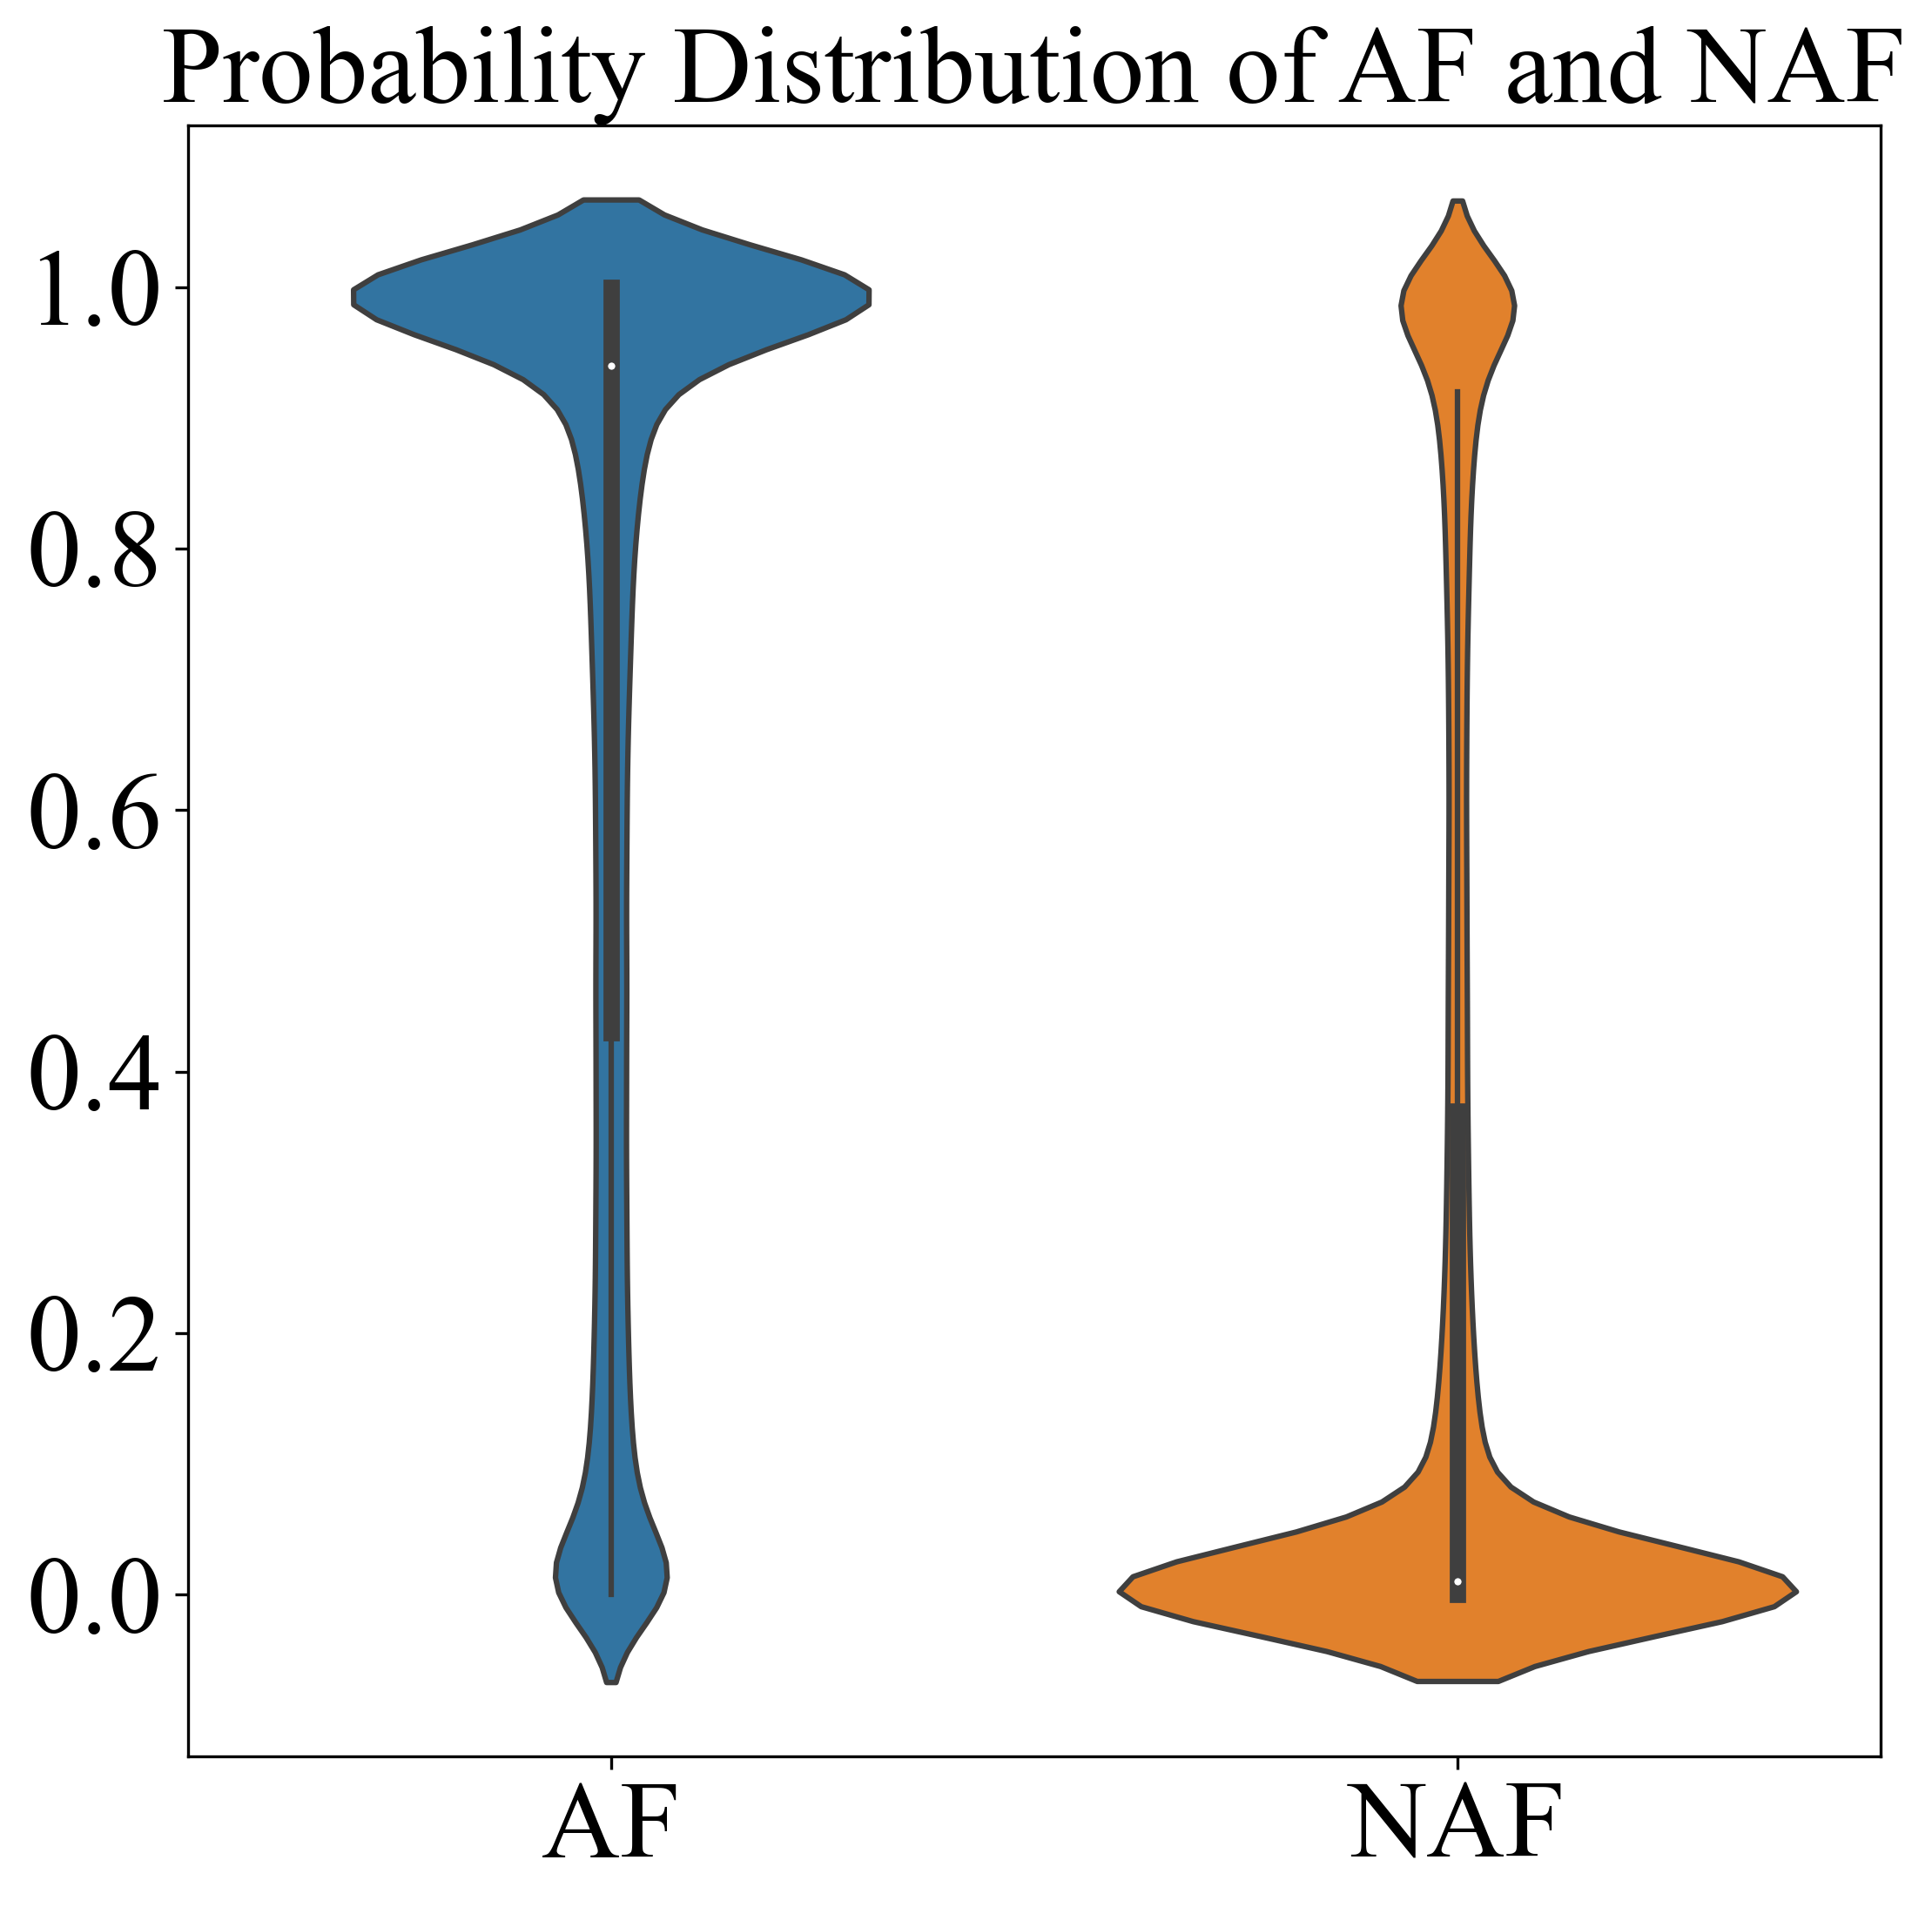

In [9]:
# 箱型图绘制
plt.figure(figsize=(8, 8))
labels = [1] * len(tp_pro_data) + [0] * len(fn_pro_data)
# sns.boxplot(data=[tp_pro_data + fn_pro_data, tn_pro_data + fp_pro_data])
sns.violinplot(data=[tp_pro_data + fn_pro_data, tn_pro_data + fp_pro_data], labels=labels)
plt.xticks([0, 1], ['AF', 'NAF'])
plt.title('Probability Distribution of AF and NAF')
# plt.ylabel('Probability')
plt.tight_layout()
plt.savefig('./DenoiseResult/Probability.png')
# plt.show()

fn_data.shape:  42303
1000


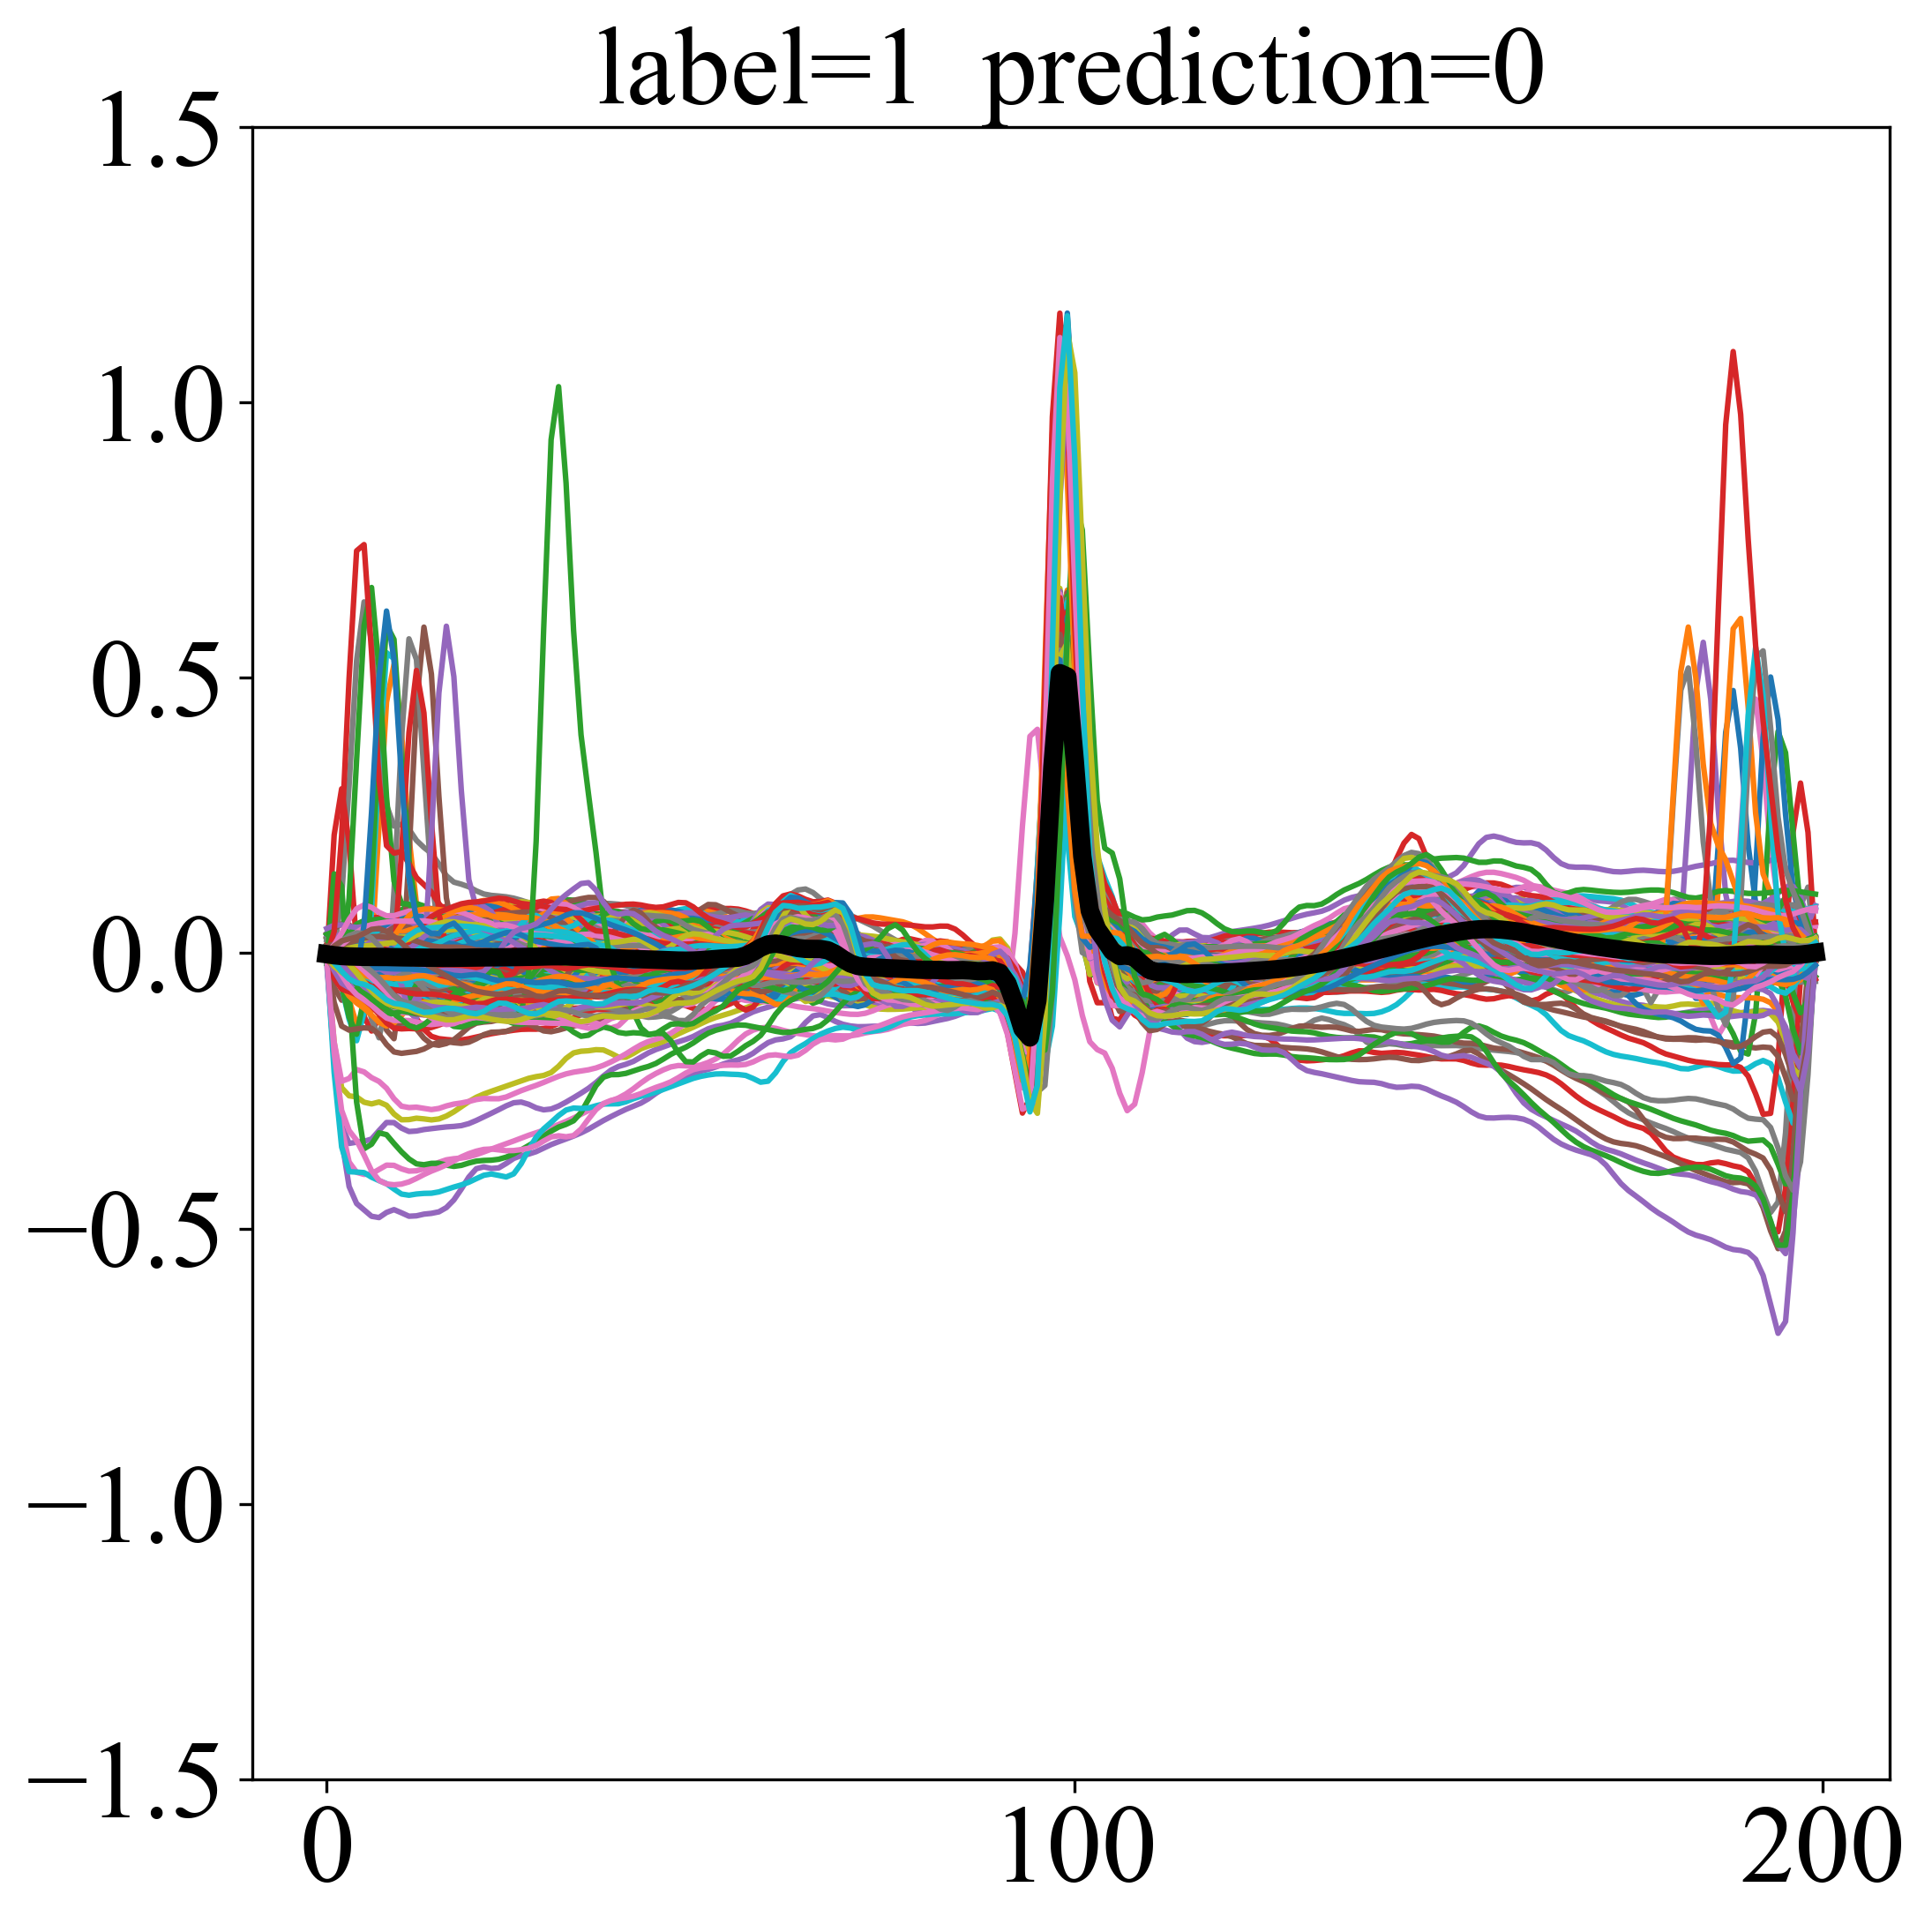

In [10]:
# fn_data
plt.figure(figsize=(8, 8))
print("fn_data.shape: ", len(fn_data))
fn_data2 = fn_data[:1000]

# 滤波操作
sfreq = 200
low_freq = 0.5
high_freq = 50.0
fn_data2 = filter_data(fn_data2, sfreq, low_freq, high_freq, method='iir', verbose=False)

print(len(fn_data2))
fn_mean_data = np.mean(fn_data2, axis=0)
for i in range(len(fn_data2)):
    plt.plot(fn_data2[i])
    plt.title('label=1  prediction=0')
plt.plot(fn_mean_data, color='black', linewidth=5)
plt.ylim(-1.5, 1.5)
plt.tight_layout()
plt.savefig('./DenoiseResult/fn_data.png')

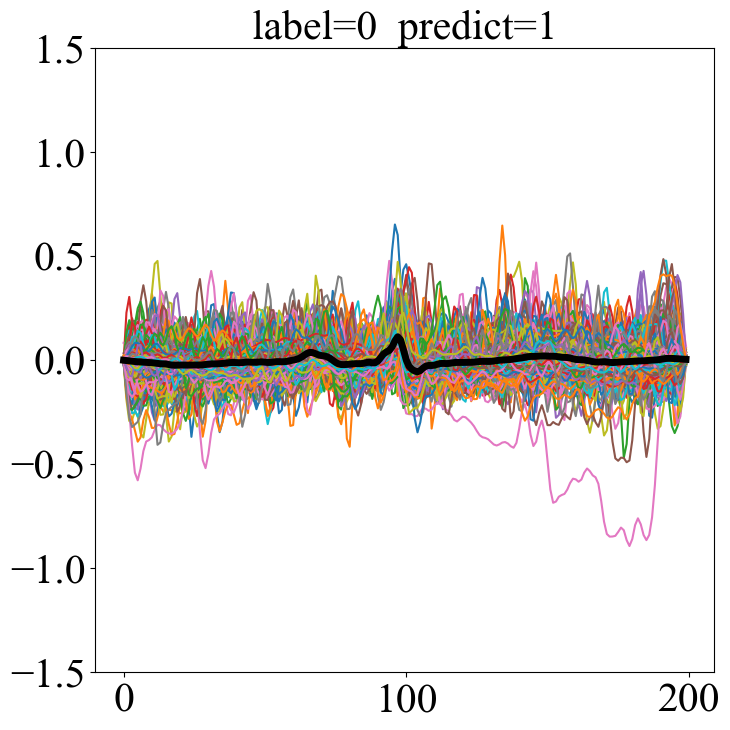

In [22]:
plt.figure(figsize=(8, 8))
fp_data2 = fp_data[5000:6000]

# 滤波操作
sfreq = 200
low_freq = 0.5
high_freq = 50.0
fp_data2 = filter_data(fp_data2, sfreq, low_freq, high_freq, method='iir', verbose=False)

fp_mean_data = np.mean(fp_data2, axis=0)
for i in range(len(fp_data2)):
    plt.plot(fp_data2[i])
    plt.title("label=0  predict=1")
plt.plot(fp_mean_data, color='black', linewidth=5)
plt.ylim(-1.5, 1.5)
plt.tight_layout()
# plt.savefig('./DenoiseResult/fp_data.png')

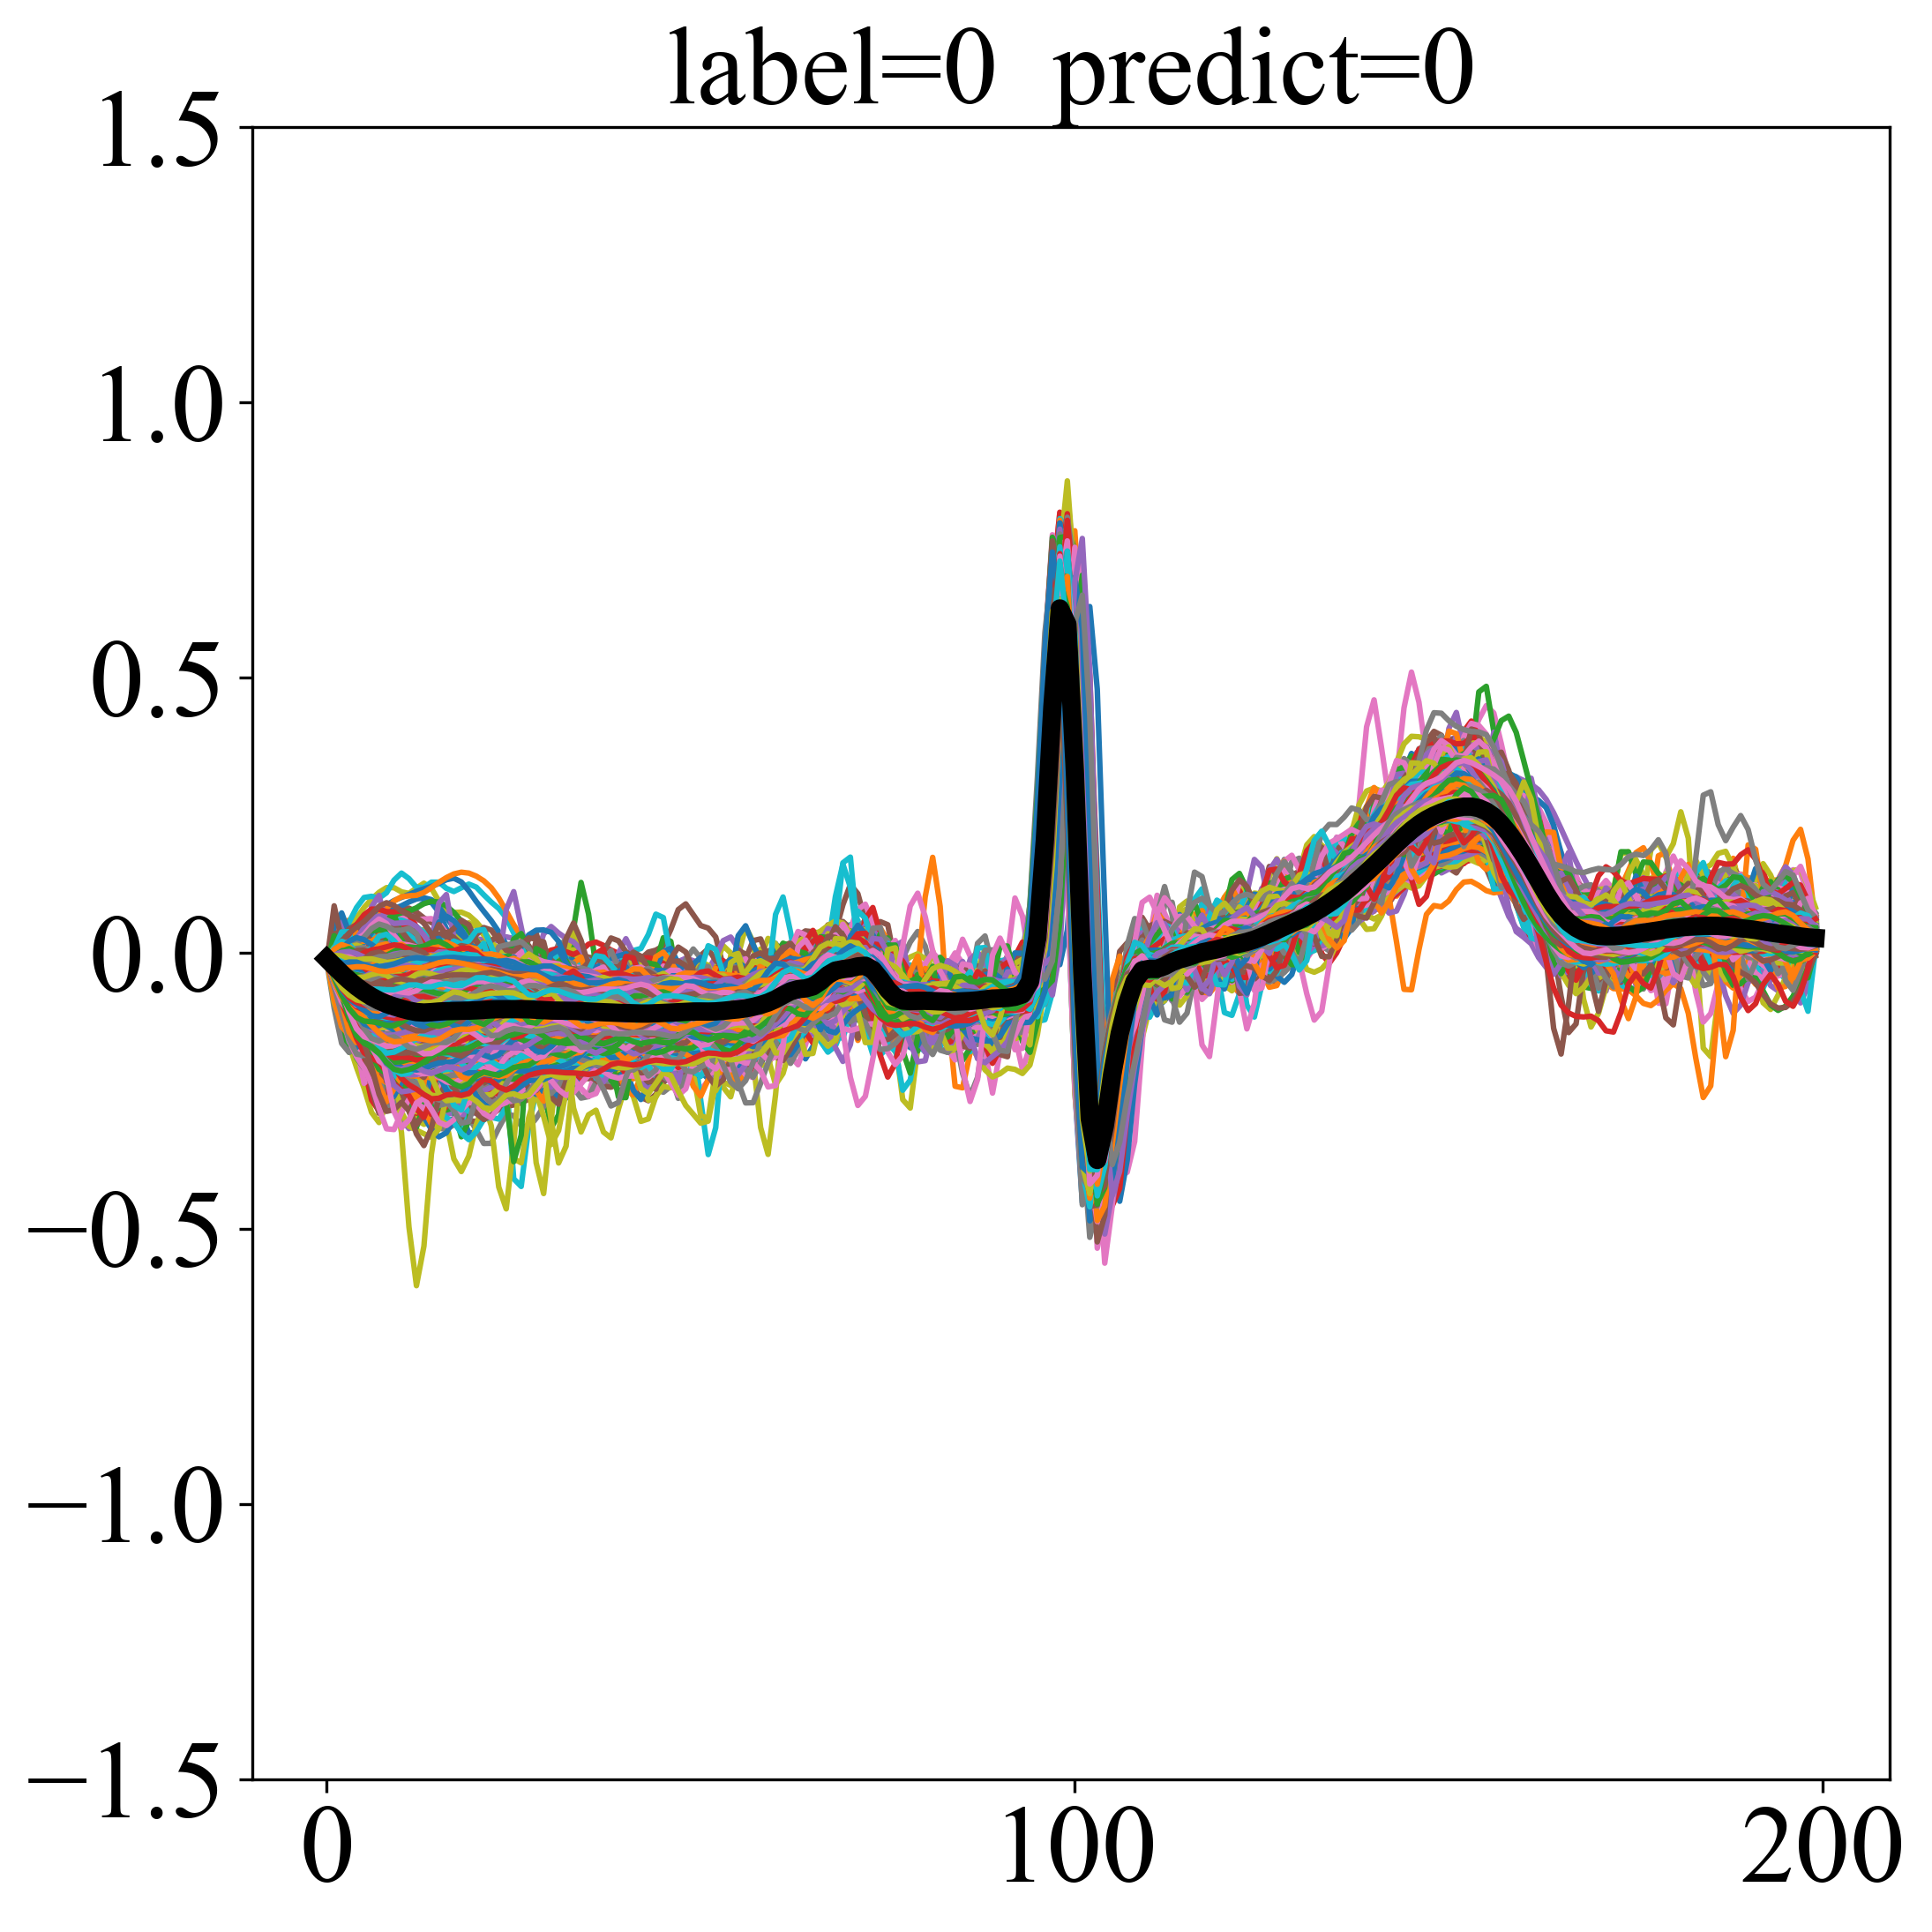

In [12]:
plt.figure(figsize=(8, 8))
tn_data2 = tn_data[:1000]

# 滤波操作
sfreq = 200
low_freq = 0.5
high_freq = 50.0
tn_data2 = filter_data(tn_data2, sfreq, low_freq, high_freq, method='iir', verbose=False)

tn_mean_data = np.mean(tn_data2, axis=0)
for i in range(len(tn_data2)):
    plt.plot(tn_data2[i])
    plt.title("label=0  predict=0")
plt.plot(tn_mean_data, color='black', linewidth=5)
plt.ylim(-1.5, 1.5)
plt.tight_layout()
plt.savefig('./DenoiseResult/tn_data.png')

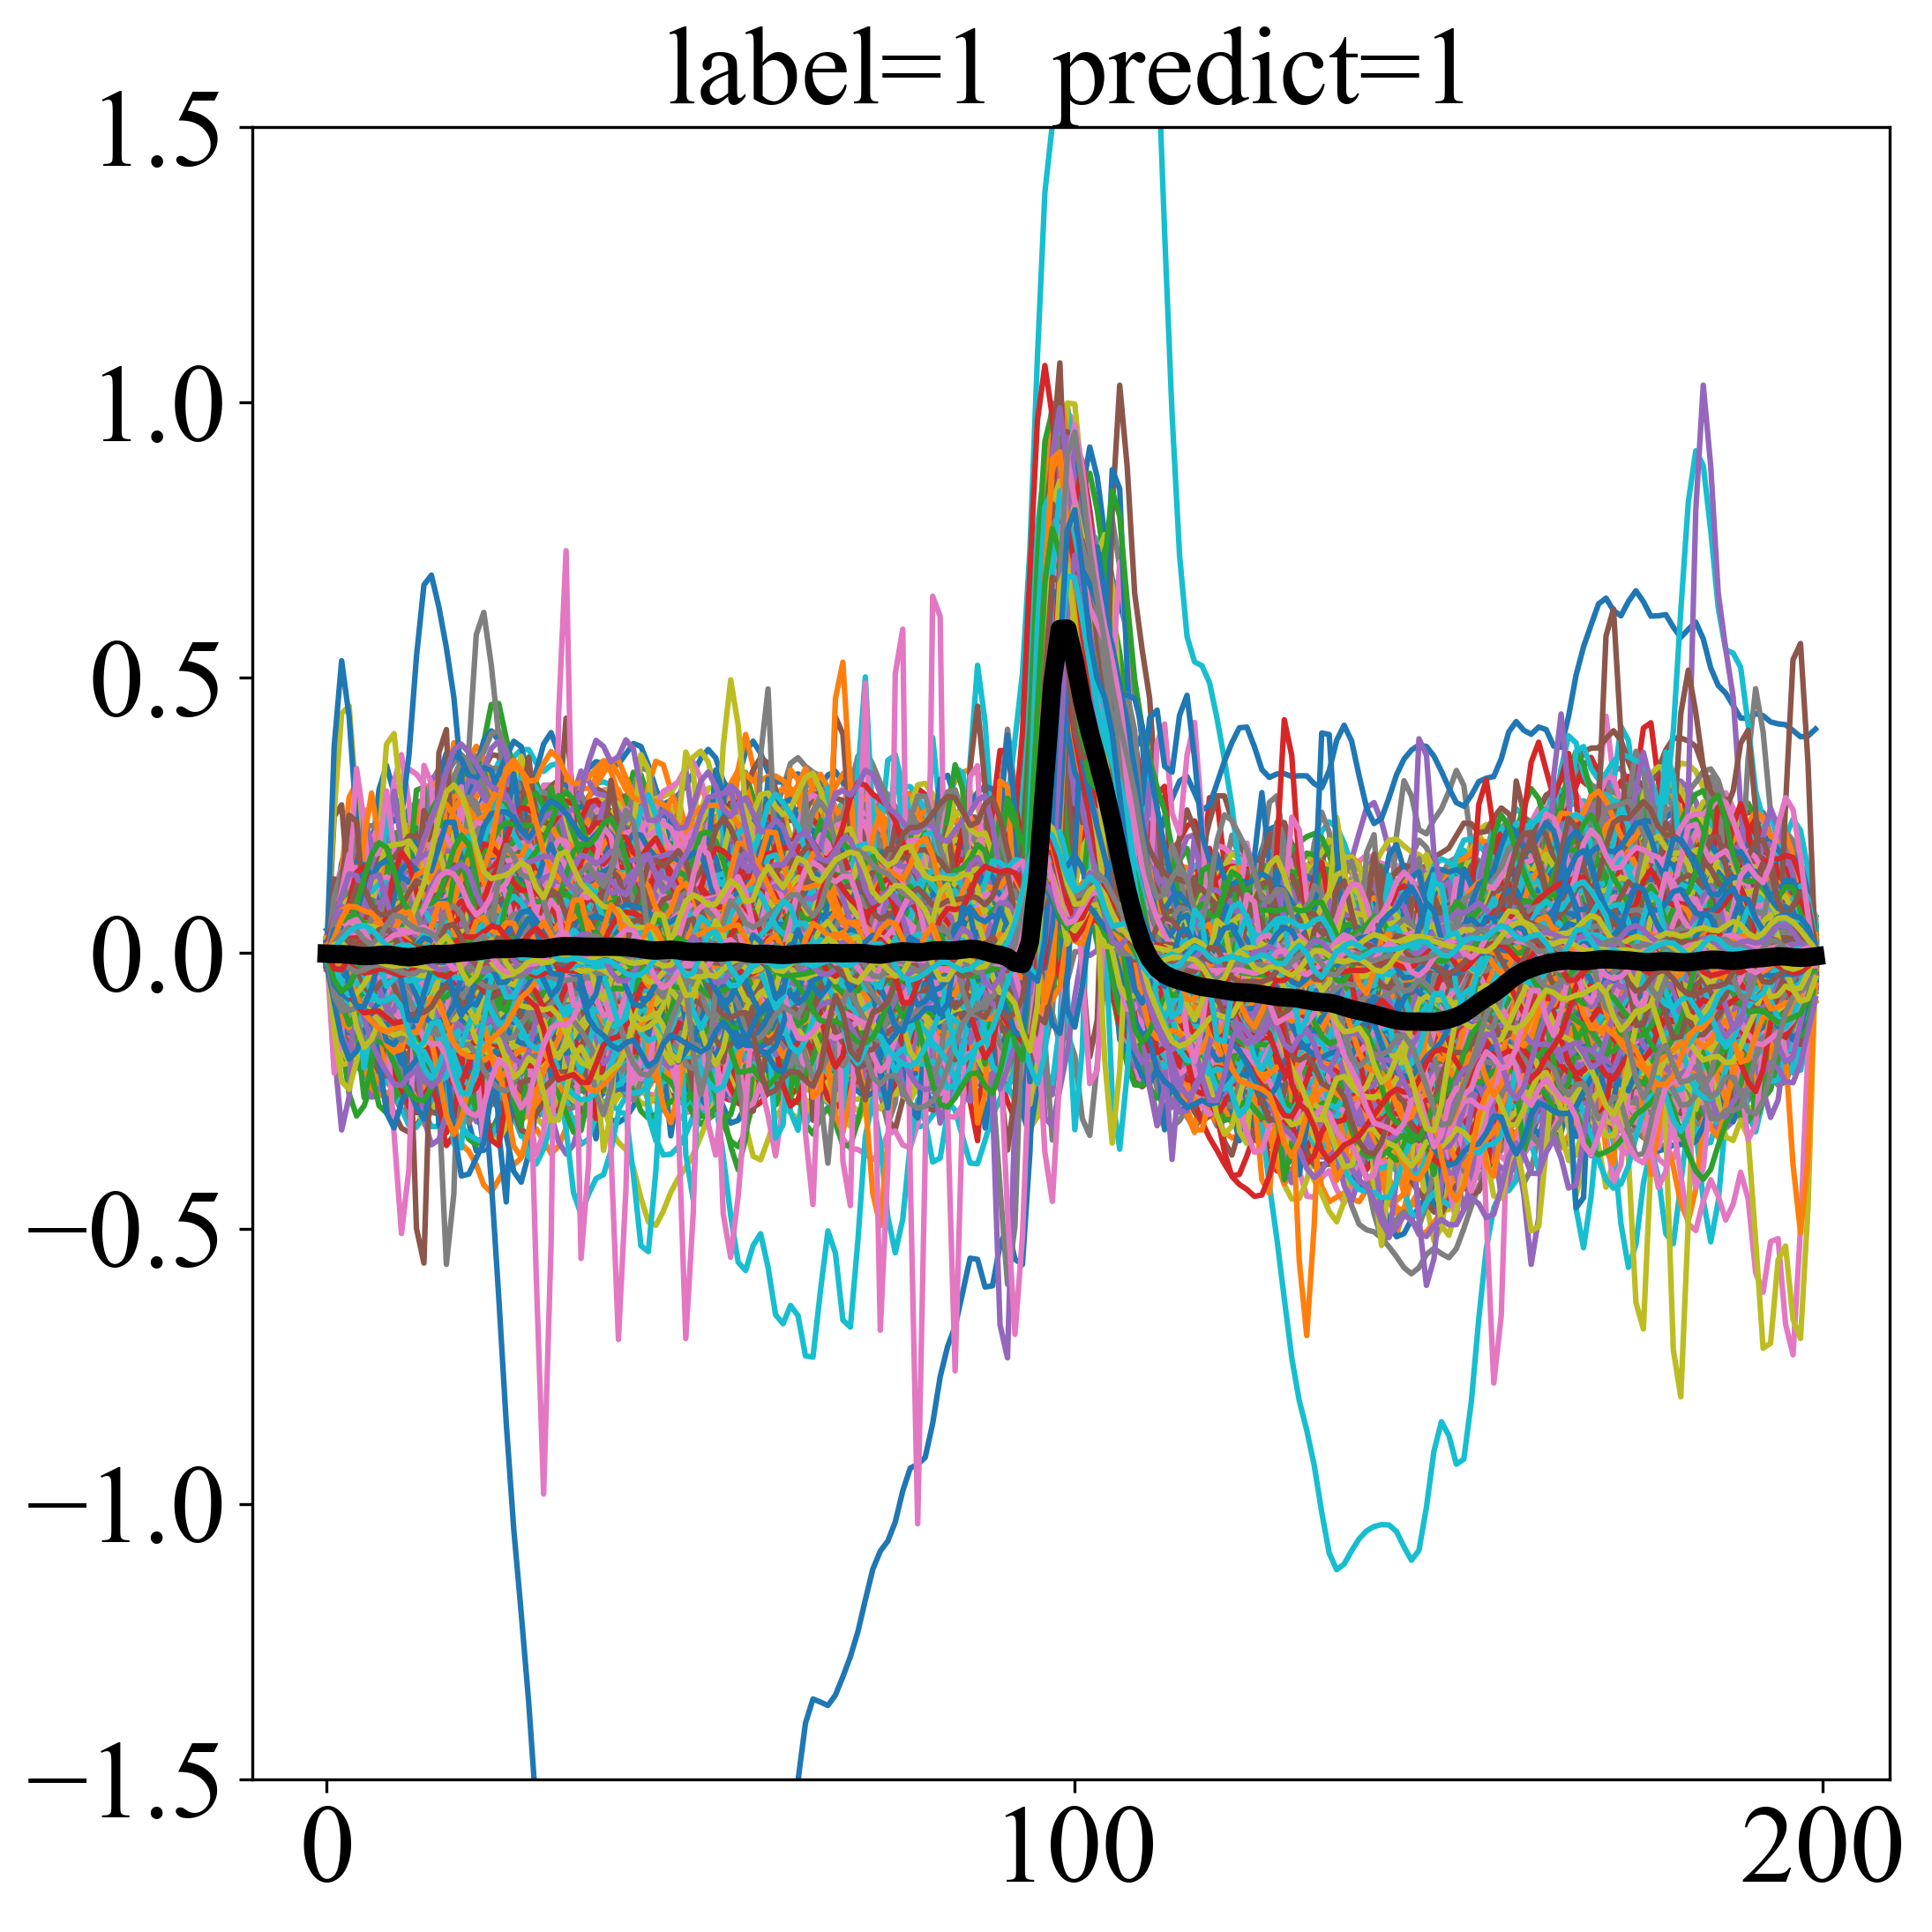

In [13]:
plt.figure(figsize=(8, 8))
tp_data2 = tp_data[3000:4000] # 3000:4000
tp_data2 = np.array(tp_data2)

# 滤波操作
sfreq = 200
low_freq = 0.5
high_freq = 50.0
tp_data2 = filter_data(tp_data2, sfreq, low_freq, high_freq, method='iir', verbose=False)

tp_mean_data = np.mean(tp_data2, axis=0)
for i in range(len(tp_data2)):
    plt.plot(tp_data2[i])
    plt.title("label=1  predict=1")
plt.plot(tp_mean_data, color='black', linewidth=5)
plt.ylim(-1.5, 1.5)
plt.tight_layout()
plt.savefig('./DenoiseResult/tp_data.png')

## Calibration-curve

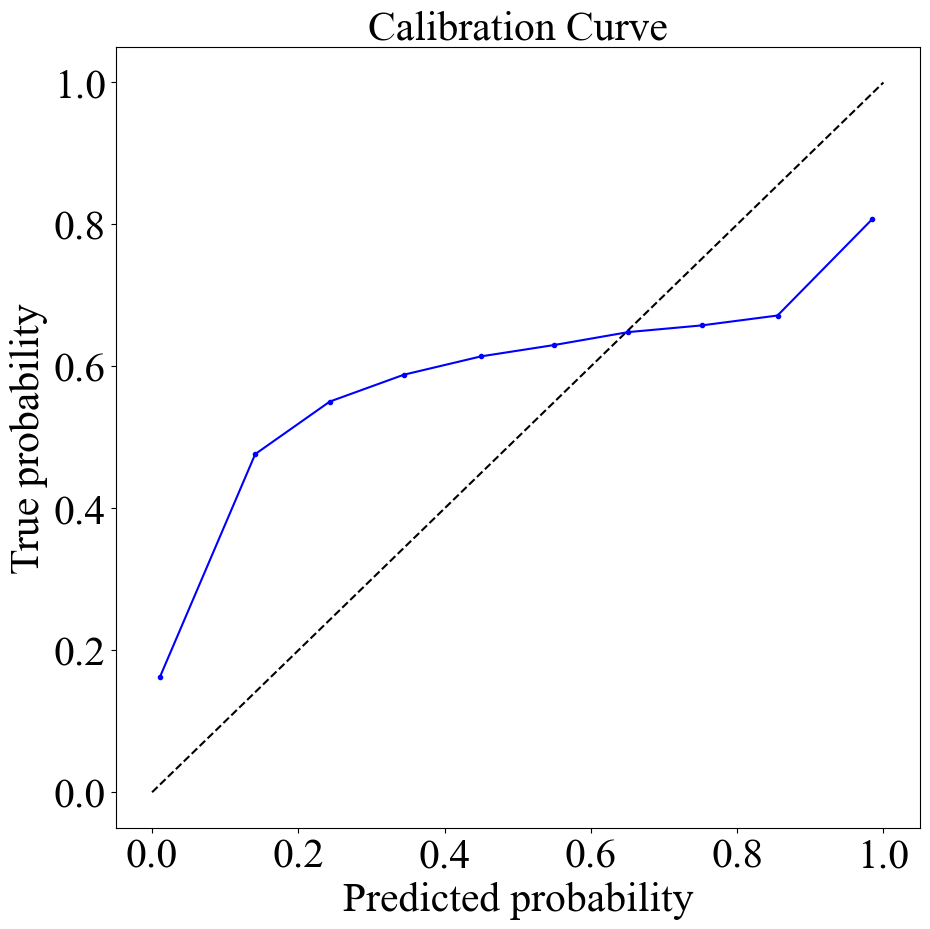

In [23]:
true_prob, pred_prob = calibration_curve(y_test, y_pred_prob, n_bins=10)
plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.plot(pred_prob, true_prob, marker='.', color='blue')
plt.xlabel('Predicted probability')
plt.ylabel('True probability')
plt.title('Calibration Curve')
# plt.legend()
plt.tight_layout()
plt.savefig('./DenoiseResult/CalibrationCurve.png')

# 无标签聚为两类

In [15]:
# x = all_data[:]
# x = np.array(x)
# # 使用 PCA 将数据降到二维
# pca = PCA(n_components=2)
# x_pca = pca.fit_transform(x)

# # 使用 KMeans 聚类算法将降维后的数据分为 2 类
# kmeans = KMeans(n_clusters=2)
# labels = kmeans.fit_predict(x_pca)

# # 统计每一类的数据量
# unique_labels, counts = np.unique(labels, return_counts=True)
# for label, count in zip(unique_labels, counts):
#     print(f"类别 {label}: {count} 个样本")

# # 将聚类结果可视化
# plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels, cmap='viridis')
# plt.title('KMeans Clustering with PCA')
# plt.tight_layout()
# plt.show()

## T-SNE降维图像绘制

In [16]:
# # print(all_data.shape)
# # x = data.iloc[0:5, :200]
# array_alldata = np.array(all_data)
# idx0 = np.where(array_alldata[:, -1] == 0)[0]
# idx1 = np.where(array_alldata[:, -1] == 1)[0]
# sample_size = 3000
# index0_sample = np.random.choice(idx0, sample_size, replace=False)
# index1_sample = np.random.choice(idx1, sample_size, replace=False)
# selected_indices = np.concatenate([index0_sample, index1_sample])
# selected_data = array_alldata[selected_indices, :-2]
# selected_label = array_alldata[selected_indices, -1]

# x = selected_data
# y = selected_label
# # x = all_data[-10000::2]
# # x = np.array(x)
# # x = x[:, :-2]
# # y = x[:, -1]
# print("x.shape: ", x.shape)
# tsne = TSNE(n_components=2, random_state=42)
# x_tsne = tsne.fit_transform(x)
# x_tsne = np.vstack((x_tsne.T, y)).T
# x_tsne = pd.DataFrame(x_tsne, columns=['Dim1', 'Dim2', 'label'])
# x_tsne['label'] = x_tsne['label'].apply(lambda x: 0 if x < 0.5 else 1)
# print("x_tsne.shape: ", x_tsne.shape)

# # outlier_indices0 = np.where((x_tsne['label'] == 0) & (x_tsne['Dim1'] > 0) & (x_tsne['Dim2'] > 100))[0]
# # outlier_indices1 = np.where((x_tsne['label'] == 1) & (x_tsne['Dim1'] > 40) & (x_tsne['Dim2'] > 25))[0]
# # print("outlier_indices0: ", outlier_indices0)
# # print("outlier_indices1: ", outlier_indices1)
# # clustering = DBSCAN(eps=0.5, min_samples=1000).fit(x_tsne[['Dim1', 'Dim2']])
# # x_tsne['cluster'] = clustering.labels_
# # outliers = x_tsne[x_tsne['cluster'] == -1]
# # print("outliers: ", outliers)

# # plt.figure(figsize=(4, 8))
# # plt.subplot(211)
# # for i in range(len(outlier_indices1)):
# #     plt.plot(x[outlier_indices1[i]])

# # plt.scatter(x_tsne[:, 0], x_tsne[:, 1],  cmap=plt.cm.get_cmap('coolwarm', 2))
# # plt.scatter(x_tsne[:, 0], x_tsne[:, 1], cmap='viridis')
# # plt.subplot(212)
# # sns.scatterplot(data=x_tsne, hue='label', x='Dim1', y='Dim2', palette='coolwarm', markers=['o', 's'])
# # 创建一个图形对象
# fig, ax = plt.subplots()
# # 提取不同标签的数据
# label_0 = x_tsne[x_tsne['label'] == 0]
# label_1 = x_tsne[x_tsne['label'] == 1]
# ax.scatter(label_0['Dim1'], label_0['Dim2'], color='lightblue', marker='o', label='Label=0')
# ax.scatter(label_1['Dim1'], label_1['Dim2'], color='lightcoral', marker='^', label='Label=1')

# ax.legend()
# ax.set_xlabel('Dim1')
# ax.set_ylabel('Dim2')
# plt.title('t-SNE Visualization')
# plt.tight_layout()
# # plt.savefig('./DenoiseResult/t-SNE.png')
# plt.show()

# 使用模型分类后结果

In [17]:
# print(all_data.shape)
# x = data.iloc[0:5, :200]
array_alldata = np.array(all_data)
idx0 = np.where(array_alldata[:, -1] == 0)[0]
idx1 = np.where(array_alldata[:, -1] == 1)[0]
sample_size = 2000
index0_sample = np.random.choice(idx0, sample_size, replace=False)
index1_sample = np.random.choice(idx1, sample_size, replace=False)
selected_indices = np.concatenate([index0_sample, index1_sample])
selected_data = array_alldata[selected_indices, :-2]
selected_label = array_alldata[selected_indices, -1]

x = selected_data
y = selected_label
x = torch.tensor(x, dtype=torch.float32)
x = x.reshape(-1, 1, 200)
y = torch.tensor(y, dtype=torch.float32)
# x = all_data[-10000::2]
# x = np.array(x)
# x = x[:, :-2]
# y = x[:, -1]
print("x.shape: ", x.shape)

model = torch.load('./Minfei/net1d.pth', map_location=torch.device('cpu'))
model.eval()
outputs = model(x)
tsne = TSNE(n_components=2, random_state=42)
x_tsne = tsne.fit_transform(outputs.detach().numpy())
x_tsne = np.vstack((x_tsne.T, y)).T
x_tsne = pd.DataFrame(x_tsne, columns=['Dim1', 'Dim2', 'label'])
x_tsne['label'] = x_tsne['label'].apply(lambda x: 0 if x < 0.5 else 1)
print("x_tsne.shape: ", x_tsne.shape)

# outlier_indices0 = np.where((x_tsne['label'] == 0) & (x_tsne['Dim1'] > 0) & (x_tsne['Dim2'] > 100))[0]
# outlier_indices1 = np.where((x_tsne['label'] == 1) & (x_tsne['Dim1'] > 40) & (x_tsne['Dim2'] > 25))[0]
# print("outlier_indices0: ", outlier_indices0)
# print("outlier_indices1: ", outlier_indices1)
# clustering = DBSCAN(eps=0.5, min_samples=1000).fit(x_tsne[['Dim1', 'Dim2']])
# x_tsne['cluster'] = clustering.labels_
# outliers = x_tsne[x_tsne['cluster'] == -1]
# print("outliers: ", outliers)

# plt.figure(figsize=(4, 8))
# plt.subplot(211)
# for i in range(len(outlier_indices1)):
#     plt.plot(x[outlier_indices1[i]])

# plt.scatter(x_tsne[:, 0], x_tsne[:, 1],  cmap=plt.cm.get_cmap('coolwarm', 2))
# plt.scatter(x_tsne[:, 0], x_tsne[:, 1], cmap='viridis')
# plt.subplot(212)
# sns.scatterplot(data=x_tsne, hue='label', x='Dim1', y='Dim2', palette='coolwarm', markers=['o', 's'])
# 创建一个图形对象
fig, ax = plt.subplots(figsize=(10, 10))
# 提取不同标签的数据
label_0 = x_tsne[x_tsne['label'] == 0]
label_1 = x_tsne[x_tsne['label'] == 1]
ax.scatter(label_0['Dim1'], label_0['Dim2'], color='lightblue', marker='o', label='Non-AF')
ax.scatter(label_1['Dim1'], label_1['Dim2'], color='lightcoral', marker='^', label='AF')

ax.legend()
ax.set_xlabel('Dim1')
ax.set_ylabel('Dim2')
plt.title('t-SNE Visualization')
plt.tight_layout()
plt.savefig('./DenoiseResult/t-SNEModel2000.png')
plt.show()

x.shape:  torch.Size([4000, 1, 200])


RuntimeError: [enforce fail at C:\cb\pytorch_1000000000000\work\c10\core\impl\alloc_cpu.cpp:72] data. DefaultCPUAllocator: not enough memory: you tried to allocate 102400000 bytes.

In [ ]:
# # print(all_data.shape)
# # x = data.iloc[0:5, :200]
# x = all_data[::100]
# x = np.array(x)
# temp = x
# x = x[:, :-2]
# y = x[:, -1]
# print("x.shape: ", x.shape)
# tsne = TSNE(n_components=2, random_state=42)
# x_tsne = tsne.fit_transform(x)
# x_tsne = np.vstack((x_tsne.T, y)).T
# x_tsne = pd.DataFrame(x_tsne, columns=['Dim1', 'Dim2', 'label'])
# x_tsne['label'] = x_tsne['label'].apply(lambda x: 0 if x < 0.5 else 1)
# print("x_tsne.shape: ", x_tsne.shape)

# n_clusters = 2
# kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# # 获取每个数据点到其簇中心的距离
# distances = kmeans.transform(x_tsne[['Dim1', 'Dim2']])

# # 设置离群点的阈值
# outliers_threshold = 95  # 通过调整阈值来确定离群点
# # outliers_mask = np.max(distances, axis=1) > outliers_threshold

# # 直接通过x_tsne的值来确定离群点
# outliers_mask = np.max(x_tsne, axis=1) > outliers_threshold
# outliers_mask = outliers_mask.values
# print("outliers_mask: ", outliers_mask)
# # 获取离群点对应的原始x值
# outliers_x = x[outliers_mask]
# outliers_temp = temp[outliers_mask][:, -2:]
# print("outliers_x.shape: ", outliers_x.shape)

# plt.figure(figsize=(4, 8))
# plt.subplot(211)
# # plt.plot(outliers_x[0])
# for pltdata in outliers_x[:]:
#     plt.plot(pltdata, alpha=0.5)
# print(x_tsne.iloc[outliers_mask])

# plt.subplot(212)
# sns.scatterplot(data=x_tsne, hue='label', x='Dim1', y='Dim2', palette='coolwarm', markers=['o', 's'])
# plt.title('t-SNE Visualization')
# plt.show()

In [ ]:
# # print(all_data.shape)
# # x = data.iloc[0:5, :200]
# x = all_data[::100]
# x = np.array(x)
# temp = x
# x = x[:, :-2]
# y = x[:, -1]
# print("x.shape: ", x.shape)
# tsne = TSNE(n_components=2, random_state=42)
# x_tsne = tsne.fit_transform(x)
# x_tsne = np.vstack((x_tsne.T, y)).T
# x_tsne = pd.DataFrame(x_tsne, columns=['Dim1', 'Dim2', 'label'])
# x_tsne['label'] = x_tsne['label'].apply(lambda x: 0 if x < 0.5 else 1)
# print("x_tsne.shape: ", x_tsne.shape)

# n_clusters = 2
# kmeans = KMeans(n_clusters=n_clusters, random_state=42)
# # Fit KMeans model
# kmeans.fit(x_tsne[['Dim1', 'Dim2']])

# # Get cluster labels
# # x_tsne['cluster'] = kmeans.predict(x_tsne[['Dim1', 'Dim2']])

# # Get cluster centers
# cluster_centers = kmeans.cluster_centers_

# # Calculate distance of each point to its cluster center
# x_tsne['distance_to_center'] = np.linalg.norm(x_tsne[['Dim1', 'Dim2']].values - cluster_centers[x_tsne['label']], axis=1)

# # Set a threshold for outlier detection (you can adjust this threshold based on your data)
# outlier_threshold = 67.0

# # Identify outliers
# outliers = x_tsne[x_tsne['distance_to_center'] > outlier_threshold]

# # # Display cluster centers
# # print("Cluster Centers:")
# # print(cluster_centers)

# # Display outliers
# # print("Outliers:")
# # print(outliers[-8:])

# plt.figure(figsize=(4, 8))
# plt.subplot(211)
# outliers_x = x[outliers.index]
# for idx, pltdata in enumerate(outliers_x[-8:]):
#     if idx == 5:
#         continue
#     plt.plot(pltdata, alpha=0.5)

# plt.subplot(212)
# sns.scatterplot(data=x_tsne, hue='label', x='Dim1', y='Dim2', palette='coolwarm', markers=['o', 's'])
# plt.title('t-SNE Visualization')
# plt.tight_layout()
# # plt.savefig('./DenoiseResult/t-SNE.png')
# plt.show()

## 预测概率的大小排序，均分为5个桶，每个桶中表示一个概率，加粗画出平均波形

In [5]:
sorted_all_data = sorted(all_data, key=lambda x: x[-2])
split0_2 = sorted_all_data[:int(len(sorted_all_data) * 0.2)]
split2_4 = sorted_all_data[int(len(sorted_all_data) * 0.2):int(len(sorted_all_data) * 0.4)]
split4_6 = sorted_all_data[int(len(sorted_all_data) * 0.4):int(len(sorted_all_data) * 0.6)]
split6_8 = sorted_all_data[int(len(sorted_all_data) * 0.6):int(len(sorted_all_data) * 0.8)]
split8_10 = sorted_all_data[int(len(sorted_all_data) * 0.8):]
# print("len(split0_2), len(split2_4), len(4_6)")

(6262, 200)
(200,)


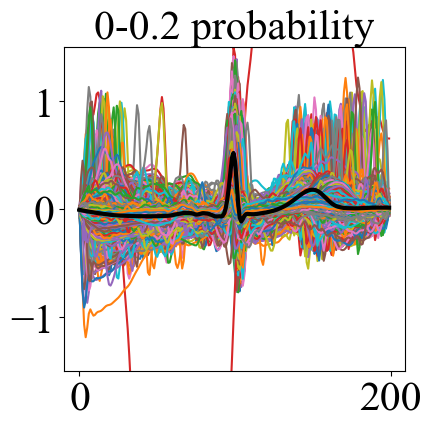

In [6]:
plt.figure(figsize=(5, 5))
split0_2array = np.array(split0_2[::10])[:, :-2]

# 滤波操作
sfreq = 200
low_freq = 0.5
high_freq = 50.0
split0_2array = filter_data(split0_2array, sfreq, low_freq, high_freq, method='iir', verbose=False)

print(split0_2array.shape)
pro_0_2_mean = np.mean(split0_2array, axis=0)
print(pro_0_2_mean.shape)
for i in range(len(split0_2array)):
    plt.plot(split0_2array[i], label='0-0.2')
plt.plot(pro_0_2_mean, label='0-0.2 mean', color='black', linewidth=3)
plt.title('0-0.2 probability')
plt.ylim(-1.5, 1.5)
plt.tight_layout()
plt.savefig('./DenoiseResult/0-0.2.png')

(6262, 200)
(200,)


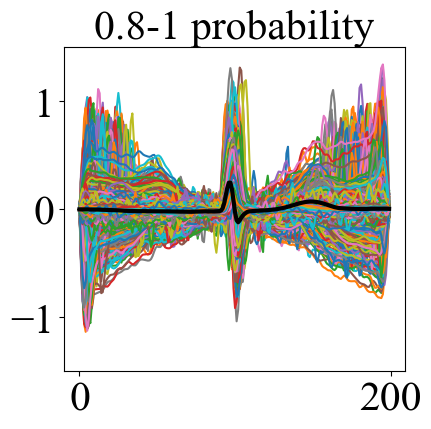

In [7]:
plt.figure(figsize=(5, 5))
split8_10array = np.array(split8_10[::10])[:, :-2]

# 滤波操作
sfreq = 200
low_freq = 0.5
high_freq = 50.0
split8_10array = filter_data(split8_10array, sfreq, low_freq, high_freq, method='iir', verbose=False)

print(split8_10array.shape)
pro_8_10_mean = np.mean(split8_10array, axis=0)
print(pro_8_10_mean.shape)
for i in range(len(split8_10array)):
    plt.plot(split8_10array[i], label='0.8-1')
plt.plot(pro_8_10_mean, label='0.8-1 mean', color='black', linewidth=3)
plt.title('0.8-1 probability')
plt.ylim(-1.5, 1.5)
plt.tight_layout()
plt.savefig('./DenoiseResult/0.8-1.png')

(6262, 200)
(200,)


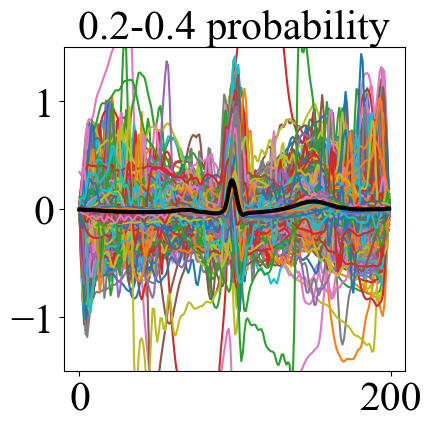

In [8]:
plt.figure(figsize=(5, 5))
split2_4array = np.array(split2_4[::10])[:, :-2]

# 滤波操作
sfreq = 200
low_freq = 0.5
high_freq = 50.0
split2_4array = filter_data(split2_4array, sfreq, low_freq, high_freq, method='iir', verbose=False)

print(split2_4array.shape)
pro_2_4_mean = np.mean(split2_4array, axis=0)
print(pro_2_4_mean.shape)
for i in range(len(split2_4array)):
    plt.plot(split2_4array[i], label='0.2-0.4')
plt.plot(pro_2_4_mean, label='0.2-0.4 mean', color='black', linewidth=3)
plt.title('0.2-0.4 probability')
plt.ylim(-1.5, 1.5)
plt.tight_layout()
plt.savefig('./DenoiseResult/0.2-0.4.png')

(6262, 200)
(200,)


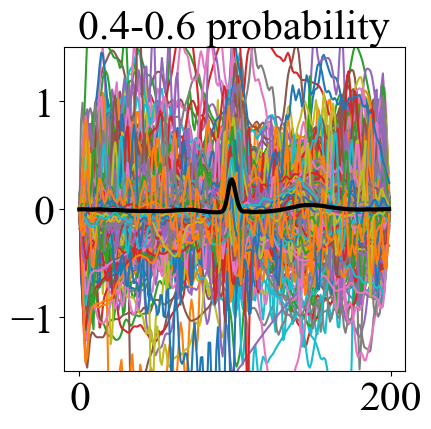

In [9]:
plt.figure(figsize=(5, 5))
split4_6array = np.array(split4_6[::10])[:, :-2]

# 滤波操作
sfreq = 200
low_freq = 0.5
high_freq = 50.0
split4_6array = filter_data(split4_6array, sfreq, low_freq, high_freq, method='iir', verbose=False)

print(split4_6array.shape)
pro_4_6_mean = np.mean(split4_6array, axis=0)
print(pro_4_6_mean.shape)
for i in range(len(split4_6array)):
    plt.plot(split4_6array[i], label='0.4-0.6')
plt.plot(pro_4_6_mean, label='0.4-0.6 mean', color='black', linewidth=3)
plt.title('0.4-0.6 probability')
plt.ylim(-1.5, 1.5)
plt.tight_layout()
plt.savefig('./DenoiseResult/0.4-0.6.png')

(6262, 200)
(200,)


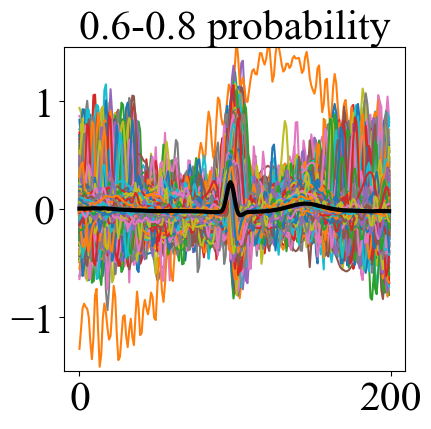

In [10]:
plt.figure(figsize=(5, 5))
split6_8array = np.array(split6_8[::10])[:, :-2]

# 滤波操作
# sfreq = 200
# low_freq = 0.5
# high_freq = 50.0
# split6_8array = filter_data(split6_8array, sfreq, low_freq, high_freq, method='iir', verbose=False)

print(split6_8array.shape)
pro_6_8_mean = np.mean(split6_8array, axis=0)
print(pro_6_8_mean.shape)
for i in range(len(split6_8array)):
    plt.plot(split6_8array[i], label='0.6-0.8')
plt.plot(pro_6_8_mean, label='0.6-0.8 mean', color='black', linewidth=3)
plt.title('0.6-0.8 probability')
plt.ylim(-1.5, 1.5)
plt.tight_layout()
plt.savefig('./DenoiseResult/0.6-0.8.png')